In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#load database
dataset = pd.read_csv('./databases/Stress_strain.csv').dropna()

# print (dataset.head(20)) #head of the data file with 20 rows
# print (dataset.tail(20))
#print (dataset.describe().T) #simple statistics like mean, std, percentile

In [18]:
# Separate elastic and plastic data
elastic_data = dataset[dataset['deformation_type'] == 'Elastic'].copy()
plastic_data = dataset[dataset['deformation_type'] == 'Plastic'].copy()

print(f"Elastic data points: {len(elastic_data)}")
print(f"Plastic data points: {len(plastic_data)}")
print(f"\nElastic data statistics:")
print(elastic_data.describe())
print(f"\nPlastic data statistics:")
print(plastic_data.describe())

Elastic data points: 1000
Plastic data points: 1000

Elastic data statistics:
           Strain       Stress
count  1000.00000  1000.000000
mean      0.01800   654.229059
std       0.00983   359.172281
min       0.00100    36.653733
25%       0.00950   342.014748
50%       0.01800   643.993507
75%       0.02650   958.868381
max       0.03500  1388.403926

Plastic data statistics:
            Strain       Stress
count  1000.000000  1000.000000
mean      0.147500  1629.210185
std       0.059267    42.430898
min       0.045000  1516.442636
25%       0.096250  1596.847778
50%       0.147500  1635.154872
75%       0.198750  1661.237547
max       0.250000  1712.771947


## Part (a): Elastic Regime - Young's Modulus
Using linear regression to model Hook's law: σ = Eϵ

In [19]:
# setup xdata which is input and y data which is target
xInput_elastic = elastic_data[['Strain']]
yTarget_elastic = elastic_data[['Stress']]

print(xInput_elastic.head(10))
print(yTarget_elastic.head(10))

      Strain
0   0.013661
1   0.019583
3   0.034796
4   0.019889
12  0.021386
13  0.013627
14  0.005595
22  0.033639
23  0.027955
28  0.016485
         Stress
0    542.664184
1    687.652482
3   1234.538771
4    713.898775
12   838.137868
13   540.421909
14   184.247552
22  1132.366235
23   915.952848
28   603.359835


In [20]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xInput_elastic,yTarget_elastic, test_size=0.2, random_state=0)

#scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

# mms = MinMaxScaler()
# x_train = mms.fit_transform(x_train)
# x_test = mms.transform(x_test)

#PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

#Train data
from sklearn.linear_model import LinearRegression 
LR=LinearRegression()
LR.fit(x_train,y_train)

# print fit values
print('intercept:',LR.intercept_)
#print('slope:',LR.coef_)
print("Coefficients")
coeff_df = pd.DataFrame(LR.coef_.T,xInput_elastic.columns, columns=['Slope']) 
E = coeff_df['Slope'].iloc[0]
print("Young's Modulus E:", E)

intercept: [-0.29877836]
Coefficients
Young's Modulus E: 36416.422895079


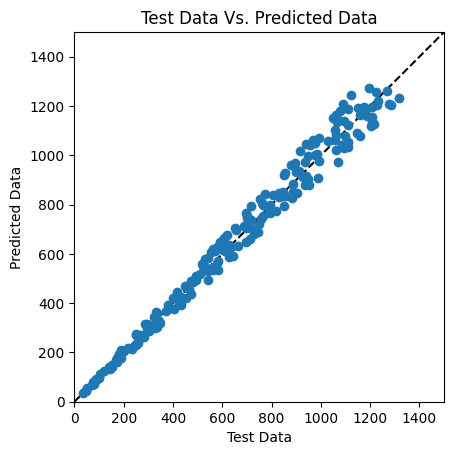

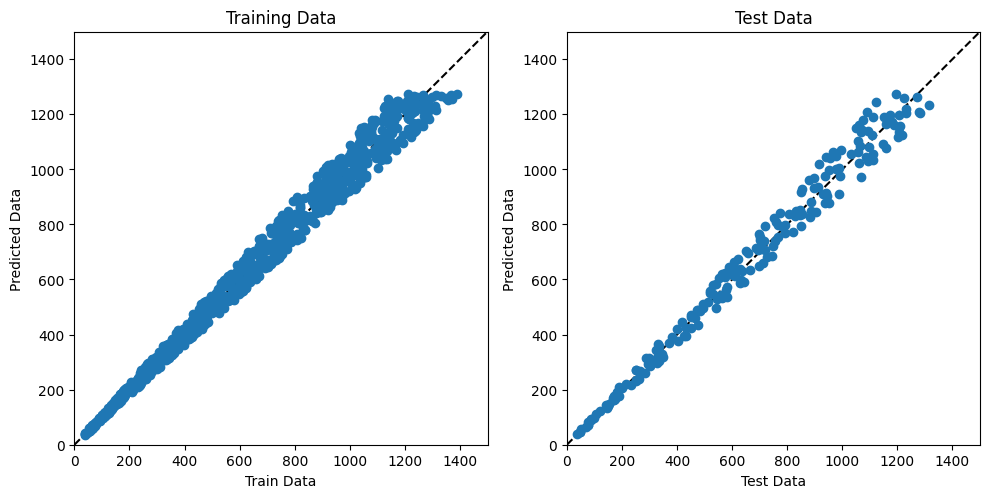

In [21]:
# get prediction on test data
predictions_train=LR.predict(x_train)
predictions_test=LR.predict(x_test)

#plot test data
f, ax = plt.subplots()
plt.scatter(y_test, predictions_test,color="C0")
ax.set_box_aspect(aspect=1)
ax.set_xlim(0,1500)
ax.set_ylim(0,1500)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="k", ls="--", zorder = 0)
plt.xlabel('Test Data') 
plt.ylabel('Predicted Data') 
plt.title('Test Data Vs. Predicted Data') 
plt.show()

#plot train and test data
f, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_box_aspect(aspect=1)
ax[0].scatter(y_train, predictions_train,color="C0")
ax[0].set_xlim(0,1500)
ax[0].set_ylim(0,1500)
ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, color="k", ls="--", zorder = 0)
ax[0].set_xlabel('Train Data') 
ax[0].set_ylabel('Predicted Data') 
ax[0].set_title('Training Data') 

ax[1].set_box_aspect(aspect=1)
ax[1].scatter(y_test, predictions_test,color="C0")
ax[1].set_xlim(0,1500)
ax[1].set_ylim(0,1500)
ax[1].plot([0, 1], [0, 1], transform=ax[1].transAxes, color="k", ls="--", zorder = 0)
ax[1].set_xlabel('Test Data') 
ax[1].set_ylabel('Predicted Data') 
ax[1].set_title('Test Data')
plt.tight_layout()
plt.show()

In [22]:
from sklearn import metrics

# Metrics for train data
print("Metrics for Training data")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predictions_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predictions_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error (y_train, predictions_train)))

# Metrics for test data
print("\nMetrics for Test data")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error (y_test, predictions_test)))


Metrics for Training data
Mean Absolute Error: 30.855648764922144
Mean Squared Error: 1658.129927396713
Root Mean Squared Error: 40.72014154440911

Metrics for Test data
Mean Absolute Error: 33.7478215851115
Mean Squared Error: 1940.7384940927138
Root Mean Squared Error: 44.05381361576673


In [23]:
# get CV score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR, x_train, y_train, scoring='r2', cv=5)
print(scores)
print("CV Score : {:5.2f}".format(np.mean(scores)))

[0.98544318 0.98697063 0.98681733 0.98776622 0.98865048]
CV Score :  0.99


## Part (b): Plastic Regime - Strength Coefficient and Strain Hardening Exponent
Using linear regression on log-transformed data: log(σ) = log(K) + n×log(ϵ)

In [24]:
# setup xdata which is input and y data which is target
xInput_plastic = np.log(plastic_data[['Strain']])
yTarget_plastic = np.log(plastic_data[['Stress']])

print(xInput_plastic.head(10))
print(yTarget_plastic.head(10))

      Strain
2  -2.077561
5  -2.410897
6  -1.942862
7  -2.003371
8  -3.034929
9  -1.957286
10 -2.420087
11 -1.670073
15 -1.404517
16 -1.637892
      Stress
2   7.373890
5   7.373248
6   7.392285
7   7.396287
8   7.340910
9   7.379940
10  7.355114
11  7.403625
15  7.410966
16  7.402308


In [25]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xInput_plastic,yTarget_plastic, test_size=0.2, random_state=0)

#scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

# mms = MinMaxScaler()
# x_train = mms.fit_transform(x_train)
# x_test = mms.transform(x_test)

#PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# x_train = pca.fit_transform(x_train)
# x_test = pca.transform(x_test)
# explained_variance = pca.explained_variance_ratio_
# print(explained_variance)

#Train data
from sklearn.linear_model import LinearRegression 
LR=LinearRegression()
LR.fit(x_train,y_train)

# print fit values
print('Intercept: log_K = ',LR.intercept_)
K = np.exp(LR.intercept_)
#print('slope:',LR.coef_)
print("Coefficients :")
coeff_df = pd.DataFrame(LR.coef_.T,xInput_plastic.columns, columns=['Slope']) 
n = coeff_df['Slope'].iloc[0]
print("Slope n:", n)

Intercept: log_K =  [7.49692838]
Coefficients :
Slope n: 0.05056376969180178


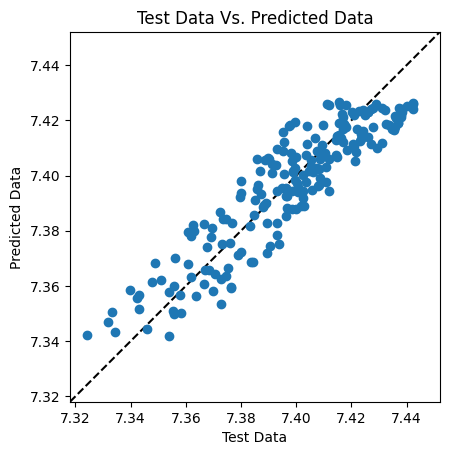

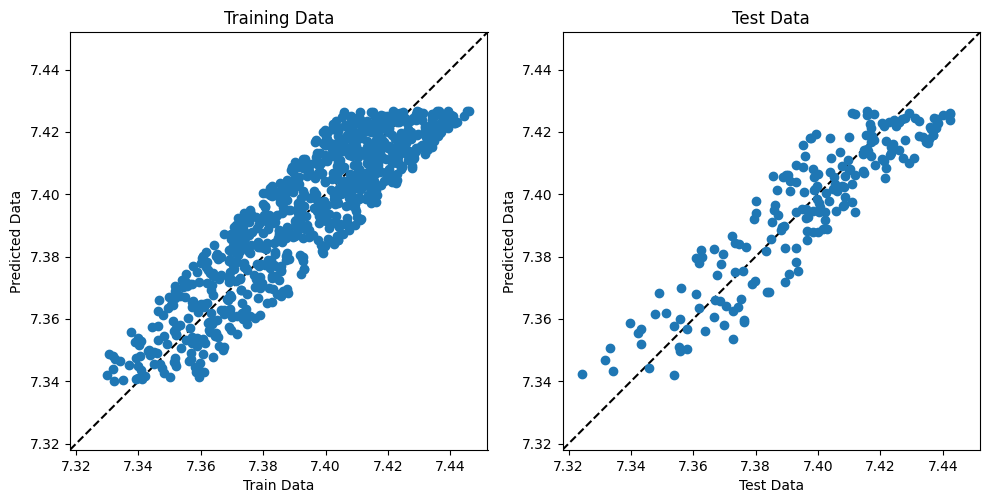

In [26]:
# get prediction on test data
predictions_train=LR.predict(x_train)
predictions_test=LR.predict(x_test)
min_val = min(y_train.values.min(), y_test.values.min(), predictions_train.min(), predictions_test.min())
max_val = max(y_train.values.max(), y_test.values.max(), predictions_train.max(), predictions_test.max())
margin = (max_val - min_val) * 0.05
x_min, x_max = min_val - margin, max_val + margin
y_min, y_max = min_val - margin, max_val + margin
perfect_fit = np.linspace(x_min, x_max, 100)

#plot test data
f, ax = plt.subplots()
plt.scatter(y_test, predictions_test,color="C0")
ax.set_box_aspect(aspect=1)
ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="k", ls="--", zorder = 0)
plt.xlabel('Test Data') 
plt.ylabel('Predicted Data') 
plt.title('Test Data Vs. Predicted Data') 
plt.show()

#plot train and test data
f, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].set_box_aspect(aspect=1)
ax[0].scatter(y_train, predictions_train,color="C0")
ax[0].set_xlim(x_min,x_max)
ax[0].set_ylim(y_min,y_max)
ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, color="k", ls="--", zorder = 0)
ax[0].set_xlabel('Train Data') 
ax[0].set_ylabel('Predicted Data') 
ax[0].set_title('Training Data') 

ax[1].set_box_aspect(aspect=1)
ax[1].scatter(y_test, predictions_test,color="C0")
ax[1].set_xlim(x_min,x_max)
ax[1].set_ylim(y_min,y_max)
ax[1].plot([0, 1], [0, 1], transform=ax[1].transAxes, color="k", ls="--", zorder = 0)
ax[1].set_xlabel('Test Data') 
ax[1].set_ylabel('Predicted Data') 
ax[1].set_title('Test Data')
plt.tight_layout()
plt.show()

In [27]:
from sklearn import metrics

# Metrics for train data
print("Metrics for Training data")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, predictions_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, predictions_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error (y_train, predictions_train)))

# Metrics for test data
print("\nMetrics for Test data")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error (y_test, predictions_test)))


Metrics for Training data
Mean Absolute Error: 0.009778651199836993
Mean Squared Error: 0.00012821705163519438
Root Mean Squared Error: 0.011323296853619725

Metrics for Test data
Mean Absolute Error: 0.009393254614970098
Mean Squared Error: 0.00012413135889109258
Root Mean Squared Error: 0.011141425352758623


In [28]:
# get CV score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR, x_train, y_train, scoring='r2', cv=5)
print(scores)
print("CV Score : {:5.2f}".format(np.mean(scores)))

[0.80988971 0.79636652 0.82164903 0.81495351 0.80440203]
CV Score :  0.81


## Part (c): Derived Material Properties
Calculate: Yield Strength, Yield Strain, Ultimate Tensile Strength, Resilience, and Toughness

In [32]:
# 1.At yield point: E*ε = K*ε^n
# Solving for ε_yield: E*ε = K*ε^n => E = K*ε^(n-1) => ε = (E/K)^(1/(n-1))

# ensure K is a scalar (it may be a 1-element array)
K_scalar = float(np.asarray(K).ravel()[0])
epsilon_yield = (E / K_scalar) ** (1 / (n - 1))
sigma_yield = E * epsilon_yield
print(f"\nYield Stress: {float(sigma_yield):.6f} MPa\n")
print(f"Yield Strain: {float(epsilon_yield):.6f} (dimensionless)\n")

# 2. Ultimate Tensile Strength (UTS): Maximum stress from the fitted plastic model
# UTS occurs at maximum strain: σ_uts = K * ε_max^n
epsilon_max = plastic_data['Strain'].max()
sigma_uts = K_scalar * (epsilon_max ** n)
print(f"Ultimate Tensile Strength (UTS): {float(sigma_uts):.6f} MPa\n")

# 3. Resilience: Area under elastic curve (energy per unit volume)
# Resilience = ∫(0 to ε_yield) E*ε dε = (1/2) * E * ε_yield^2
resilience = 0.5 * E * float(epsilon_yield)**2
print(f"Resilience: {float(resilience):.6f} MJ/m³ (or MPa)\n")


# 4. Toughness: Total area under stress-strain curve
# Toughness = Elastic area + Plastic area
# Elastic area (already calculated as resilience)
# Plastic area = ∫(ε_yield to ε_max) K*ε^n dε = K/(n+1) * (ε_max^(n+1) - ε_yield^(n+1))

plastic_area = (K / (n + 1)) * (epsilon_max**(n + 1) - epsilon_yield**(n + 1))
toughness = resilience + plastic_area
toughness = float(np.asarray(toughness).ravel()[0])
print(f"Toughness: {float(toughness):.6f} MJ/m³ (or MPa)\n")


Yield Stress: 1535.862099 MPa

Yield Strain: 0.042175 (dimensionless)

Ultimate Tensile Strength (UTS): 1680.475580 MPa

Resilience: 32.387481 MJ/m³ (or MPa)

Toughness: 370.628665 MJ/m³ (or MPa)



## Part (d): Stress-Strain Plot with Material Properties
Visualizing the fitted models and key material properties

Plot saved as 'stress_strain_plot.png'


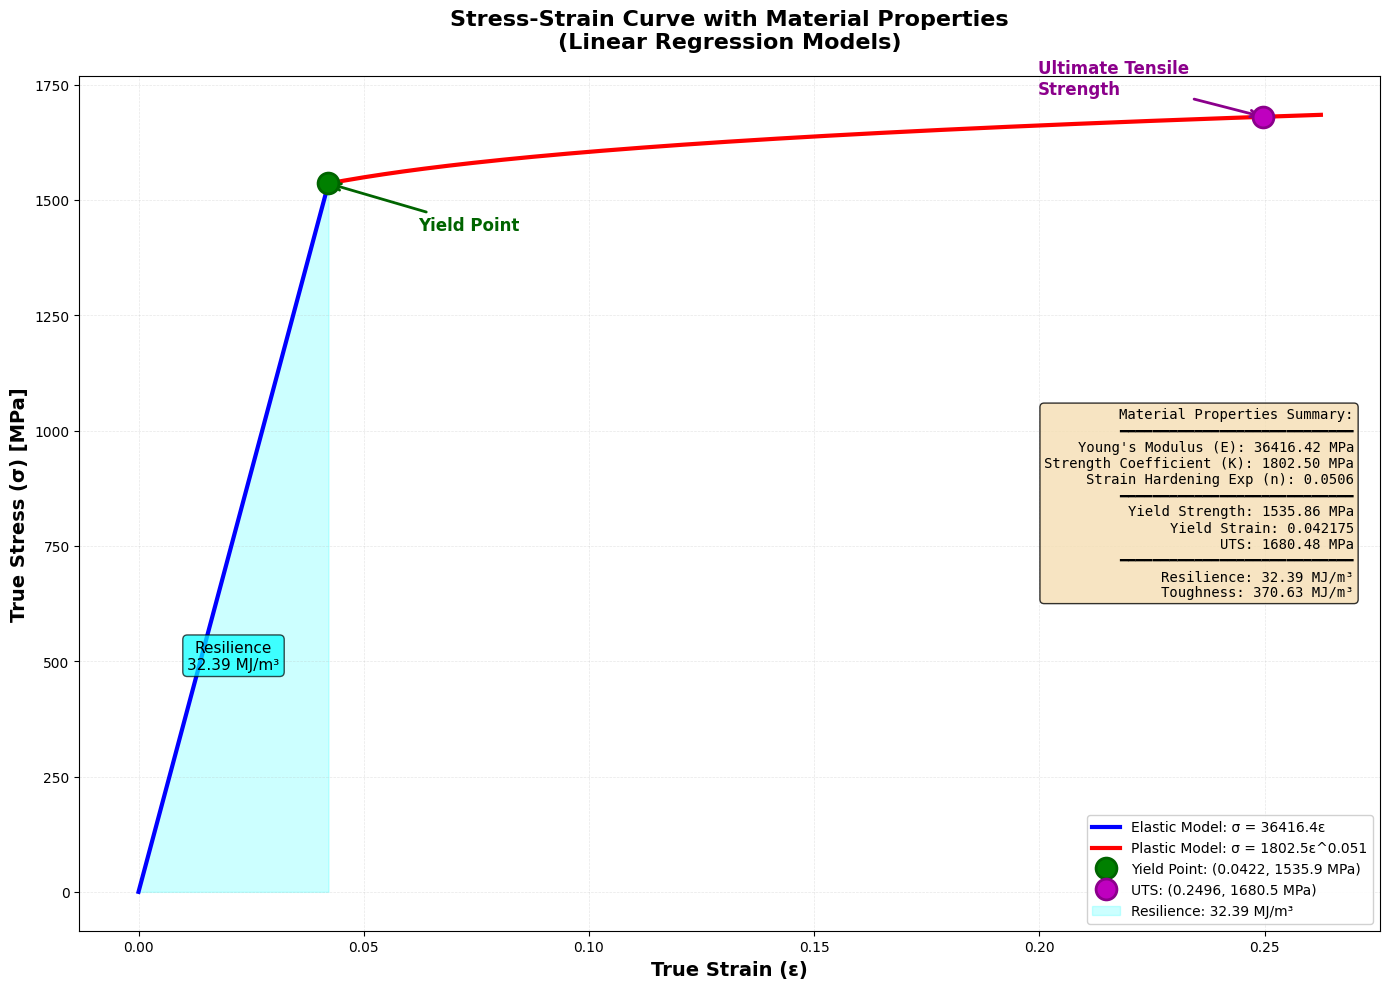

In [30]:
# Part (d): Create comprehensive stress-strain plot

# Convert all variables to scalars for plotting
E_plot = float(E)
K_plot = float(K_scalar)
n_plot = float(n)
epsilon_yield_plot = float(epsilon_yield)
sigma_yield_plot = float(sigma_yield)
epsilon_uts_plot = float(plastic_data.loc[plastic_data['Stress'].idxmax(), 'Strain'])
sigma_uts_plot = float(sigma_uts)
epsilon_max_plot = float(epsilon_max)
resilience_plot = float(resilience)
toughness_plot = float(toughness)

# Set up figure with high quality
fig, ax = plt.subplots(figsize=(14, 10))

# Generate smooth curves for fitted models (predicted values only)
# Elastic region
strain_elastic_fit = np.linspace(0, epsilon_yield_plot, 200)
stress_elastic_fit = E_plot * strain_elastic_fit

# Plastic region  
strain_plastic_fit = np.linspace(epsilon_yield_plot, epsilon_max_plot * 1.05, 200)
stress_plastic_fit = K_plot * strain_plastic_fit**n_plot

# Plot fitted models (predicted curves)
ax.plot(strain_elastic_fit, stress_elastic_fit, 
       'b-', linewidth=3, label=f'Elastic Model: σ = {E_plot:.1f}ε', zorder=3)
ax.plot(strain_plastic_fit, stress_plastic_fit, 
       'r-', linewidth=3, label=f'Plastic Model: σ = {K_plot:.1f}ε^{n_plot:.3f}', zorder=3)

# Mark yield point
ax.plot(epsilon_yield_plot, sigma_yield_plot, 'go', markersize=15, 
       label=f'Yield Point: ({epsilon_yield_plot:.4f}, {sigma_yield_plot:.1f} MPa)', 
       zorder=5, markeredgecolor='darkgreen', markeredgewidth=2)
ax.annotate('Yield Point', xy=(epsilon_yield_plot, sigma_yield_plot), 
           xytext=(epsilon_yield_plot + 0.02, sigma_yield_plot - 100),
           fontsize=12, fontweight='bold', color='darkgreen',
           arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2))

# Mark UTS point
ax.plot(epsilon_uts_plot, sigma_uts_plot, 'mo', markersize=15, 
       label=f'UTS: ({epsilon_uts_plot:.4f}, {sigma_uts_plot:.1f} MPa)', 
       zorder=5, markeredgecolor='darkmagenta', markeredgewidth=2)
ax.annotate('Ultimate Tensile\nStrength', xy=(epsilon_uts_plot, sigma_uts_plot), 
           xytext=(epsilon_uts_plot - 0.05, sigma_uts_plot + 50),
           fontsize=12, fontweight='bold', color='darkmagenta',
           arrowprops=dict(arrowstyle='->', color='darkmagenta', lw=2))

# Shade resilience area (elastic region)
ax.fill_between(strain_elastic_fit[strain_elastic_fit <= epsilon_yield_plot], 
               0, E_plot * strain_elastic_fit[strain_elastic_fit <= epsilon_yield_plot],
               alpha=0.2, color='cyan', 
               label=f'Resilience: {resilience_plot:.2f} MJ/m³', zorder=1)

# Add text annotation for resilience
ax.text(epsilon_yield_plot/2, sigma_yield_plot/3, 
       f'Resilience\n{resilience_plot:.2f} MJ/m³', 
       fontsize=11, ha='center', va='center', 
       bbox=dict(boxstyle='round', facecolor='cyan', alpha=0.7))

# Add grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Labels and title
ax.set_xlabel('True Strain (ε)', fontsize=14, fontweight='bold')
ax.set_ylabel('True Stress (σ) [MPa]', fontsize=14, fontweight='bold')
ax.set_title('Stress-Strain Curve with Material Properties\n(Linear Regression Models)', 
            fontsize=16, fontweight='bold', pad=20)

# Legend
ax.legend(loc='lower right', fontsize=10, framealpha=0.9)

# Add text box with material properties
properties_text = f"""Material Properties Summary:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Young's Modulus (E): {E_plot:.2f} MPa
Strength Coefficient (K): {K_plot:.2f} MPa
Strain Hardening Exp (n): {n_plot:.4f}
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Yield Strength: {sigma_yield_plot:.2f} MPa
Yield Strain: {epsilon_yield_plot:.6f}
UTS: {sigma_uts_plot:.2f} MPa
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Resilience: {resilience_plot:.2f} MJ/m³
Toughness: {toughness_plot:.2f} MJ/m³"""

ax.text(0.98, 0.5, properties_text, transform=ax.transAxes,
       fontsize=10, verticalalignment='center', horizontalalignment='right',
       fontfamily='monospace',
       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('stress_strain_plot.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'stress_strain_plot.png'")
plt.show()

## Part (e): Material Comparison
Compare the newly discovered material with Stainless Steel (304)

In [33]:
# Create comparison database with only Stainless Steel (304)
# Store values from Part (c) calculations
E_plot = float(E)
epsilon_yield_plot = float(epsilon_yield)
sigma_yield_plot = float(sigma_yield)
sigma_uts_plot = float(sigma_uts)  # Now calculated from fitted model
K_plot = float(K_scalar)
n_plot = float(n)
resilience_plot = float(resilience)
toughness_plot = float(toughness)

# Material comparison database
materials_database = {
    'Material': ['New Material (Discovered)', 'Stainless Steel (304)'],
    'Young\'s Modulus (GPa)': [E_plot/1000, 193],  # Convert MPa to GPa
    'Yield Strength (MPa)': [sigma_yield_plot, 215],
    'UTS (MPa)': [sigma_uts_plot, 505],
    'Strain Hardening Exponent (n)': [n_plot, 0.45],
    'Toughness (MJ/m³)': [toughness_plot, 300]
}

materials_df = pd.DataFrame(materials_database)

# Calculate percentage differences
materials_df['E % Diff'] = ((materials_df['Young\'s Modulus (GPa)'].iloc[0] - materials_df['Young\'s Modulus (GPa)'].iloc[1]) / materials_df['Young\'s Modulus (GPa)'].iloc[1] * 100)
materials_df['Yield % Diff'] = ((materials_df['Yield Strength (MPa)'].iloc[0] - materials_df['Yield Strength (MPa)'].iloc[1]) / materials_df['Yield Strength (MPa)'].iloc[1] * 100)
materials_df['UTS % Diff'] = ((materials_df['UTS (MPa)'].iloc[0] - materials_df['UTS (MPa)'].iloc[1]) / materials_df['UTS (MPa)'].iloc[1] * 100)
materials_df['n % Diff'] = ((materials_df['Strain Hardening Exponent (n)'].iloc[0] - materials_df['Strain Hardening Exponent (n)'].iloc[1]) / materials_df['Strain Hardening Exponent (n)'].iloc[1] * 100)
materials_df['Toughness % Diff'] = ((materials_df['Toughness (MJ/m³)'].iloc[0] - materials_df['Toughness (MJ/m³)'].iloc[1]) / materials_df['Toughness (MJ/m³)'].iloc[1] * 100)

# Display comparison table
print("\n" + "="*100)
print("MATERIAL COMPARISON: NEW MATERIAL vs. STAINLESS STEEL (304)")
print("="*100)
print("\nProperty Comparison:")
print("-"*100)
comparison_display = materials_df[['Material', 'Young\'s Modulus (GPa)', 'Yield Strength (MPa)', 
                                     'UTS (MPa)', 'Strain Hardening Exponent (n)', 'Toughness (MJ/m³)']].copy()
print(comparison_display.to_string(index=False))
print("-"*100)

# Display percentage differences
print("\nPercentage Differences (New Material vs. Stainless Steel 304):")
print("-"*100)
diff_data = {
    'Property': ['Young\'s Modulus', 'Yield Strength', 'UTS', 'Strain Hardening (n)', 'Toughness'],
    'Difference (%)': [materials_df['E % Diff'].iloc[0], 
                       materials_df['Yield % Diff'].iloc[0],
                       materials_df['UTS % Diff'].iloc[0],
                       materials_df['n % Diff'].iloc[0],
                       materials_df['Toughness % Diff'].iloc[0]]
}
diff_df = pd.DataFrame(diff_data)
print(diff_df.to_string(index=False))
print("-"*100)
print("\nNote: Positive % indicates the new material has higher value than Stainless Steel 304")
print("      Negative % indicates the new material has lower value than Stainless Steel 304")
print("="*100)


MATERIAL COMPARISON: NEW MATERIAL vs. STAINLESS STEEL (304)

Property Comparison:
----------------------------------------------------------------------------------------------------
                 Material  Young's Modulus (GPa)  Yield Strength (MPa)  UTS (MPa)  Strain Hardening Exponent (n)  Toughness (MJ/m³)
New Material (Discovered)              36.416423           1535.862099 1680.47558                       0.050564         370.628665
    Stainless Steel (304)             193.000000            215.000000  505.00000                       0.450000         300.000000
----------------------------------------------------------------------------------------------------

Percentage Differences (New Material vs. Stainless Steel 304):
----------------------------------------------------------------------------------------------------
            Property  Difference (%)
     Young's Modulus      -81.131387
      Yield Strength      614.354465
                 UTS      232.767442
Strain

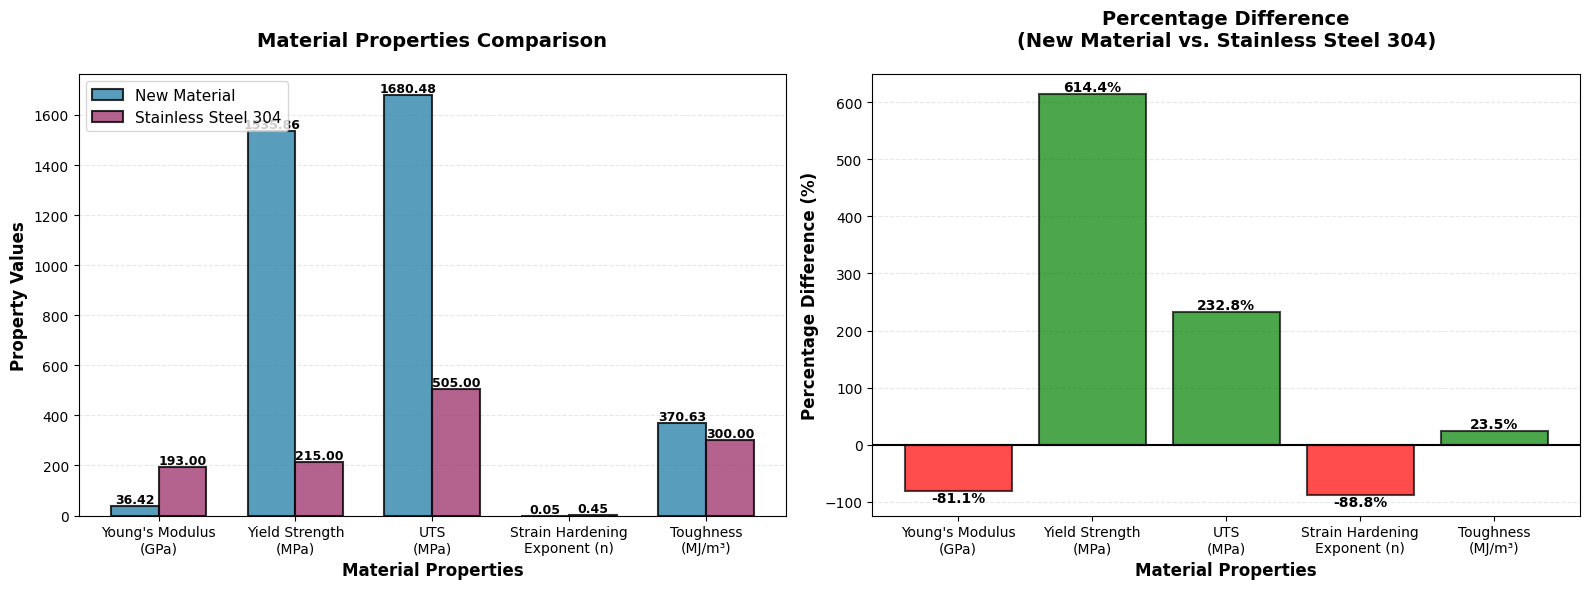


ENGINEERING INTERPRETATION: WHAT STANDS OUT ABOUT THE NEW MATERIAL?

Key Observations:

1. STIFFNESS (Young's Modulus):
   - The new material has a Young's Modulus of 36.42 GPa compared to 193 GPa for Stainless Steel 304
   - This represents a -81.1% difference
   - Interpretation: The new material is LESS STIFF than Stainless Steel 304, meaning it deforms more easily under load.

2. STRENGTH:
   - Yield Strength: 1535.86 MPa vs. 215 MPa (614.4% difference)
   - Ultimate Tensile Strength (UTS): 1680.48 MPa vs. 505 MPa (232.8% difference)
   - Interpretation: The new material is STRONGER than Stainless Steel 304 in both yield and ultimate strength.

3. DUCTILITY (Strain Hardening):
   - Strain hardening exponent (n): 0.051 vs. 0.45 (-88.8% difference)
   - Interpretation: Lower strain hardening exponent indicates LESS DUCTILITY and earlier necking under tension.

4. ENERGY ABSORPTION (Toughness):
   - Toughness: 370.63 MJ/m³ vs. 300 MJ/m³ (23.5% difference)
   - Interpretation: Higher 

In [34]:
# Create side-by-side bar chart comparison
properties = ['Young\'s Modulus\n(GPa)', 'Yield Strength\n(MPa)', 'UTS\n(MPa)', 
              'Strain Hardening\nExponent (n)', 'Toughness\n(MJ/m³)']

# Prepare data for plotting
new_material_values = [
    E_plot/1000,  # Convert to GPa
    sigma_yield_plot,
    sigma_uts_plot,
    n_plot,
    toughness_plot
]

stainless_steel_values = [193, 215, 505, 0.45, 300]

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Side-by-side bar chart
x = np.arange(len(properties))
width = 0.35

bars1 = axes[0].bar(x - width/2, new_material_values, width, label='New Material', 
                     color='#2E86AB', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = axes[0].bar(x + width/2, stainless_steel_values, width, label='Stainless Steel 304', 
                     color='#A23B72', alpha=0.8, edgecolor='black', linewidth=1.5)

axes[0].set_xlabel('Material Properties', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Property Values', fontsize=12, fontweight='bold')
axes[0].set_title('Material Properties Comparison', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xticks(x)
axes[0].set_xticklabels(properties, fontsize=10)
axes[0].legend(fontsize=11, loc='upper left')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')
axes[0].set_axisbelow(True)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}',
                     ha='center', va='bottom', fontsize=9, fontweight='bold')

# Subplot 2: Percentage difference bar chart
diff_values = [
    materials_df['E % Diff'].iloc[0],
    materials_df['Yield % Diff'].iloc[0],
    materials_df['UTS % Diff'].iloc[0],
    materials_df['n % Diff'].iloc[0],
    materials_df['Toughness % Diff'].iloc[0]
]

colors = ['green' if val > 0 else 'red' for val in diff_values]
bars3 = axes[1].bar(properties, diff_values, color=colors, alpha=0.7, 
                     edgecolor='black', linewidth=1.5)

axes[1].set_xlabel('Material Properties', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage Difference (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Percentage Difference\n(New Material vs. Stainless Steel 304)', 
                   fontsize=14, fontweight='bold', pad=20)
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1.5)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1].set_axisbelow(True)

# Add value labels
for bar, val in zip(bars3, diff_values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                 f'{val:.1f}%',
                 ha='center', va='bottom' if val > 0 else 'top', 
                 fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Engineering interpretation
print("\n" + "="*100)
print("ENGINEERING INTERPRETATION: WHAT STANDS OUT ABOUT THE NEW MATERIAL?")
print("="*100)
print("""
Key Observations:

1. STIFFNESS (Young's Modulus):
   - The new material has a Young's Modulus of {:.2f} GPa compared to 193 GPa for Stainless Steel 304
   - This represents a {:.1f}% difference
   - Interpretation: {}

2. STRENGTH:
   - Yield Strength: {:.2f} MPa vs. 215 MPa ({:.1f}% difference)
   - Ultimate Tensile Strength (UTS): {:.2f} MPa vs. 505 MPa ({:.1f}% difference)
   - Interpretation: {}

3. DUCTILITY (Strain Hardening):
   - Strain hardening exponent (n): {:.3f} vs. 0.45 ({:.1f}% difference)
   - Interpretation: {}

4. ENERGY ABSORPTION (Toughness):
   - Toughness: {:.2f} MJ/m³ vs. 300 MJ/m³ ({:.1f}% difference)
   - Interpretation: {}

OVERALL ASSESSMENT:
{}
""".format(
    E_plot/1000, 
    materials_df['E % Diff'].iloc[0],
    "The new material is STIFFER than Stainless Steel 304, meaning it resists deformation better." if materials_df['E % Diff'].iloc[0] > 0 else "The new material is LESS STIFF than Stainless Steel 304, meaning it deforms more easily under load.",
    
    sigma_yield_plot, materials_df['Yield % Diff'].iloc[0],
    sigma_uts_plot, materials_df['UTS % Diff'].iloc[0],
    "The new material is STRONGER than Stainless Steel 304 in both yield and ultimate strength." if materials_df['Yield % Diff'].iloc[0] > 0 and materials_df['UTS % Diff'].iloc[0] > 0 else "The new material has LOWER STRENGTH than Stainless Steel 304, which may limit its use in high-stress applications." if materials_df['Yield % Diff'].iloc[0] < 0 and materials_df['UTS % Diff'].iloc[0] < 0 else "Mixed strength characteristics - needs careful consideration for specific applications.",
    
    n_plot, materials_df['n % Diff'].iloc[0],
    "Higher strain hardening exponent indicates BETTER DUCTILITY and work hardening behavior." if materials_df['n % Diff'].iloc[0] > 0 else "Lower strain hardening exponent indicates LESS DUCTILITY and earlier necking under tension.",
    
    toughness_plot, materials_df['Toughness % Diff'].iloc[0],
    "Higher toughness means the material can ABSORB MORE ENERGY before failure, making it more resistant to impact and fracture." if materials_df['Toughness % Diff'].iloc[0] > 0 else "Lower toughness means the material absorbs LESS ENERGY before failure, potentially making it more brittle.",
    
    "This new material shows {} characteristics compared to Stainless Steel 304. It would be {} for applications requiring {}.".format(
        "SUPERIOR" if sum([1 if diff > 0 else 0 for diff in diff_values]) >= 3 else "MIXED" if sum([1 if diff > 0 else 0 for diff in diff_values]) >= 2 else "INFERIOR",
        "WELL-SUITED" if sum([1 if diff > 0 else 0 for diff in diff_values]) >= 3 else "SUITABLE FOR SPECIFIC APPLICATIONS" if sum([1 if diff > 0 else 0 for diff in diff_values]) >= 2 else "LESS SUITABLE",
        "high stiffness, strength, and energy absorption" if sum([1 if diff > 0 else 0 for diff in diff_values]) >= 3 else "balanced mechanical properties" if sum([1 if diff > 0 else 0 for diff in diff_values]) >= 2 else "applications where these specific properties are not critical"
    )
))
print("="*100)